In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SEED = 101
np.random.seed(SEED)

In [3]:
# Creating a toy data set for easy visualizations

SIZE = 10
x = np.random.randint(0, 20, SIZE)
y = np.random.randint(0, 20, SIZE)

X = pd.DataFrame(list(zip(x, y)), columns=['x', 'y'])

print("Toy Matrix\n------------")
print(X)

Toy Matrix
------------
    x   y
0  11   0
1  17  14
2   6   5
3  11  12
4  15   8
5   9  17
6  13  19
7   8  15
8   4   8
9   8  19


In [4]:
# Hierarchial clustering

## Intercluster-distance helper function (following single linkage)
def get_intercluster_distance(cluster_one, cluster_two):
    distances = []
    for sample_one in cluster_one:
        for sample_two in cluster_two:
            distances.append(np.linalg.norm(sample_one - sample_two))
    return np.min(distances)

## Distance matrix on an individual sample basis
def get_distance_matrix(data, col_size):
    matrix_row_count = len(data)
    distance_matrix = np.empty((matrix_row_count, matrix_row_count))
    distance_matrix.fill(np.inf)
    for i in range(matrix_row_count):
        for j in range(matrix_row_count):
            if i != j:
                cluster_one = data[i].reshape(-1, col_size)
                cluster_two = data[j].reshape(-1, col_size)
                distance_matrix[i, j] = get_intercluster_distance(cluster_one, cluster_two)
    return distance_matrix

### Performing Hierarchial clustering algorithm
def hierarchial_clustering(X, cluster_count):
    col_size = X.shape[1]
    data = list(X.values)

    while (len(data) > cluster_count):
        
        distance_matrix = get_distance_matrix(data, col_size)
        matrix_min_distance_idx = np.where(distance_matrix == distance_matrix.min())[0]

        sample_tobe_clustered = data.pop(matrix_min_distance_idx[1])
        cluster = np.append(data[matrix_min_distance_idx[0]].reshape(-1, 2), 
                            np.array(sample_tobe_clustered).reshape(-1, 2), 
                            axis=0)
        data.append(cluster)
        data.pop(matrix_min_distance_idx[0])
        
    return data

In [5]:
cluster_array = hierarchial_clustering(X, cluster_count=4)

Text(0, 0.5, 'Euclidean distance')

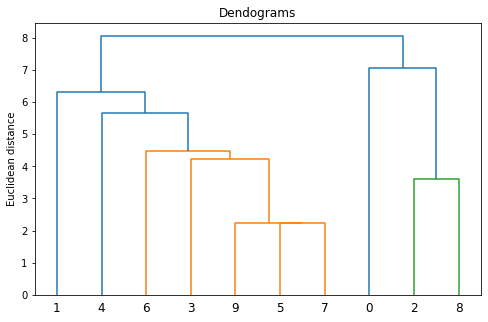

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z   = linkage(X, 'single')
fig = plt.figure(figsize=(8, 5))
dn  = dendrogram(Z)
plt.title('Dendograms')
plt.ylabel('Euclidean distance')